In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
filename = "https://raw.githubusercontent.com/ENVS110a-SP23/group8-project/main/BKB_WaterQualityData_2020084%20(1).csv"
df = pd.read_csv(filename)
sns.set_theme()

# do this two lines of code below actually drop the values, or do I need to remove them still?
#df.loc[df.isnull().any(axis=1),:].reset_index(drop=True)
#df.loc[df.isin(['Not Recorded']).any(axis=1),:].reset_index(drop=True)

In [60]:
df.head(5)

,Site_Id,Unit_Id,Read_Date,Salinity (ppt),Dissolved Oxygen (mg/L),pH (standard units),Secchi Depth (m),Water Depth (m),Water Temp (?C),Air Temp-Celsius,Air Temp (?F),Time (24:00),Field_Tech,DateVerified,WhoVerified,AirTemp (C),Year
0,Bay,NaN,1/3/1994,1.3,11.7,7.3,0.40,0.40,5.9,8.0,46.40,11:00,NaN,NaN,NaN,8.0,1994
1,Bay,NaN,1/31/1994,1.5,12.0,7.4,0.20,0.35,3.0,2.6,36.68,11:30,NaN,NaN,NaN,2.6,1994
2,Bay,NaN,2/7/1994,1.0,10.5,7.2,0.25,0.60,5.9,7.6,45.68,9:45,NaN,NaN,NaN,7.6,1994
3,Bay,NaN,2/23/1994,1.0,10.1,7.4,0.35,0.50,10.0,2.7,36.86,NaN,NaN,NaN,NaN,2.7,1994
4,Bay,NaN,2/28/1994,1.0,12.6,7.2,0.20,0.40,1.6,0.0,32.00,10:30,NaN,NaN,NaN,0.0,1994


In [61]:
df['Site_Id'].unique()

array(['Bay', 'A', 'B', 'C', 'D', 'd', nan], dtype=object)

In [62]:
%matplotlib inline 
for name, group in df.groupby('Site_Id'):
    sal = group['Salinity (ppt)'].isna().sum()
    oxy =  group['Dissolved Oxygen (mg/L)'].isna().sum()
    print(f'Site: {name} Data obs. {group.shape[0]} Missing Salinity: {sal} Missing Oxygen: {oxy}' )

Site: A Data obs. 434 Missing Salinity: 20 Missing Oxygen: 250
Site: B Data obs. 437 Missing Salinity: 20 Missing Oxygen: 241
Site: Bay Data obs. 794 Missing Salinity: 52 Missing Oxygen: 29
Site: C Data obs. 264 Missing Salinity: 17 Missing Oxygen: 130
Site: D Data obs. 440 Missing Salinity: 20 Missing Oxygen: 199
Site: d Data obs. 1 Missing Salinity: 0 Missing Oxygen: 1


After looking at the overview above of the different sites and the number of missing salinity and oxygen values from each, we went through and chose that the best sites to use for hypothesis testing and comparison are: Bay, site B, and site C. Thus, these are the ones that we compared down below with hypothesis testing, and looked at the correlation for.

In [63]:
# correlation between Salinty and Oxygen by site. .corr() automatically discards any missing data.
data = df[df['Site_Id'] != 'd'][['Site_Id','Water Temp (?C)','Salinity (ppt)','Dissolved Oxygen (mg/L)']] #site id 'd' is a mistake probably
for name, group in data.groupby(['Site_Id']):
    subset = group[['Salinity (ppt)','Dissolved Oxygen (mg/L)']]
    print(f'Site: {name} Salinity-Oxygen corr.: {subset.corr()}' )


Site: A Salinity-Oxygen corr.:                          Salinity (ppt)  Dissolved Oxygen (mg/L)
Salinity (ppt)                 1.000000                -0.095719
Dissolved Oxygen (mg/L)       -0.095719                 1.000000
Site: B Salinity-Oxygen corr.:                          Salinity (ppt)  Dissolved Oxygen (mg/L)
Salinity (ppt)                 1.000000                -0.128458
Dissolved Oxygen (mg/L)       -0.128458                 1.000000
Site: Bay Salinity-Oxygen corr.:                          Salinity (ppt)  Dissolved Oxygen (mg/L)
Salinity (ppt)                  1.00000                  0.29022
Dissolved Oxygen (mg/L)         0.29022                  1.00000
Site: C Salinity-Oxygen corr.:                          Salinity (ppt)  Dissolved Oxygen (mg/L)
Salinity (ppt)                 1.000000                -0.006503
Dissolved Oxygen (mg/L)       -0.006503                 1.000000
Site: D Salinity-Oxygen corr.:                          Salinity (ppt)  Dissolved Oxygen (mg/L

In [64]:
# correlation between Salinty and Oxygen by site. .corr() automatically discards any missing data.

for name, group in data.groupby(['Site_Id']):
    subset = group[['Water Temp (?C)','Dissolved Oxygen (mg/L)']]
    print(f'Site: {name} Water Temp.-Oxygen corr.: {subset.corr()}' )

Site: A Water Temp.-Oxygen corr.:                          Water Temp (?C)  Dissolved Oxygen (mg/L)
Water Temp (?C)                 1.000000                -0.561362
Dissolved Oxygen (mg/L)        -0.561362                 1.000000
Site: B Water Temp.-Oxygen corr.:                          Water Temp (?C)  Dissolved Oxygen (mg/L)
Water Temp (?C)                 1.000000                -0.562605
Dissolved Oxygen (mg/L)        -0.562605                 1.000000
Site: Bay Water Temp.-Oxygen corr.:                          Water Temp (?C)  Dissolved Oxygen (mg/L)
Water Temp (?C)                 1.000000                -0.474446
Dissolved Oxygen (mg/L)        -0.474446                 1.000000
Site: C Water Temp.-Oxygen corr.:                          Water Temp (?C)  Dissolved Oxygen (mg/L)
Water Temp (?C)                 1.000000                -0.584645
Dissolved Oxygen (mg/L)        -0.584645                 1.000000
Site: D Water Temp.-Oxygen corr.:                          Water Temp 

In [65]:
for name, group in data.groupby(['Site_Id']):
    subset = group[['Water Temp (?C)','Salinity (ppt)']]
    print(f'Site: {name} Water Temp.-Salinity corr.: {subset.corr()}' )

Site: A Water Temp.-Salinity corr.:                  Water Temp (?C)  Salinity (ppt)
Water Temp (?C)         1.000000       -0.027104
Salinity (ppt)         -0.027104        1.000000
Site: B Water Temp.-Salinity corr.:                  Water Temp (?C)  Salinity (ppt)
Water Temp (?C)         1.000000       -0.014508
Salinity (ppt)         -0.014508        1.000000
Site: Bay Water Temp.-Salinity corr.:                  Water Temp (?C)  Salinity (ppt)
Water Temp (?C)         1.000000        0.083101
Salinity (ppt)          0.083101        1.000000
Site: C Water Temp.-Salinity corr.:                  Water Temp (?C)  Salinity (ppt)
Water Temp (?C)         1.000000       -0.064105
Salinity (ppt)         -0.064105        1.000000
Site: D Water Temp.-Salinity corr.:                  Water Temp (?C)  Salinity (ppt)
Water Temp (?C)         1.000000       -0.047932
Salinity (ppt)         -0.047932        1.000000


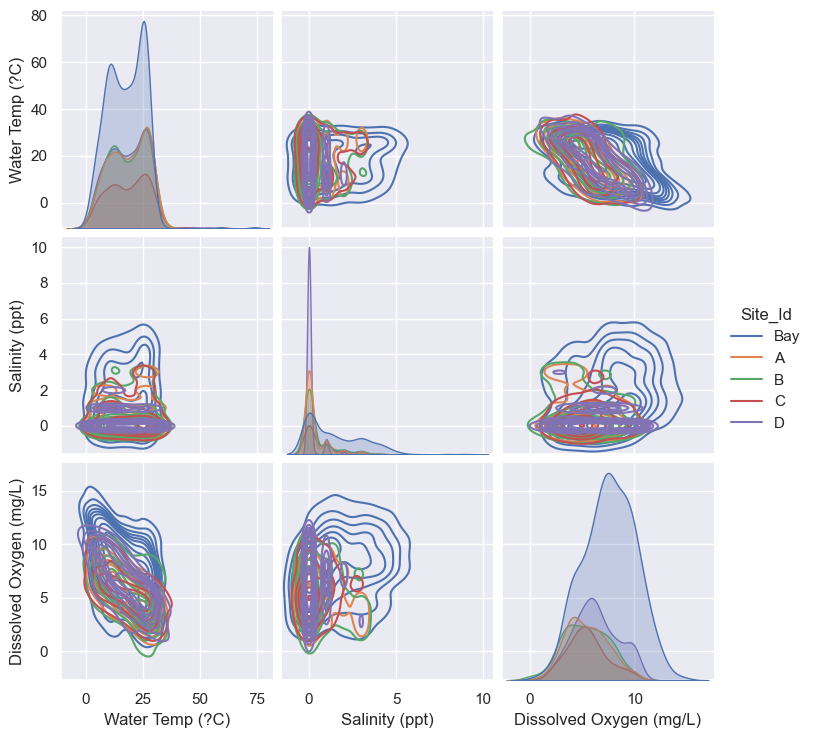

In [66]:
sns.pairplot(data,hue='Site_Id',kind='kde',dropna=True)

### Illustrated above are elevation charts for design aesthetic (this can be changed to scatter plots it will depict the same thing)
### Each color represents a different site within the dataset (The bay has the highest variation in salinity probably because its the biggest body of water)
### In some of the graphs the slope of the contours depicts a correlation between two variables. (for example upper right corner illustrates ### a negative correlation between Dissolved Oxygen and Water Temperature  --> more dissolved oxygen correlates with lower water temperature ### and vice versa)



PearsonRResult(statistic=0.3030473415686472, pvalue=3.200957705080505e-32)


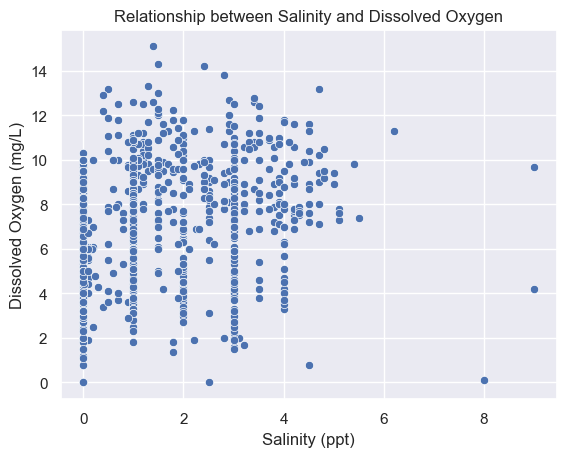

In [67]:
df_sub = df.loc[(df['Salinity (ppt)'].notnull()) & (df['Dissolved Oxygen (mg/L)'].notnull()),:].reset_index(drop=True)
ax = sns.scatterplot(x='Salinity (ppt)', y='Dissolved Oxygen (mg/L)', data=df_sub)
ax.set_title('Relationship between Salinity and Dissolved Oxygen') # add title
# can't figure out how to save the figure correctly to the git path online
plt.savefig('Salinity_vs_Dissolved_Oxygen_Scatterplot.png')
print(stats.pearsonr(df_sub['Salinity (ppt)'], df_sub['Dissolved Oxygen (mg/L)']))


Correlation between Salinity (ppt) and Dissolved Oxygen (mg/L):
                         Salinity (ppt)  Dissolved Oxygen (mg/L)  \
Salinity (ppt)                 1.000000                 0.303047   
Dissolved Oxygen (mg/L)        0.303047                 1.000000   
pH (standard units)            0.305178                 0.056197   
Secchi Depth (m)              -0.158061                -0.052864   
Water Depth (m)               -0.075305                -0.006511   
Water Temp (?C)                0.006429                -0.525993   
Air Temp-Celsius               0.087555                -0.333206   
Air Temp (?F)                  0.095180                -0.456090   
AirTemp (C)                    0.071170                -0.311399   
Year                          -0.622196                -0.361268   

                         pH (standard units)  Secchi Depth (m)  \
Salinity (ppt)                      0.305178         -0.158061   
Dissolved Oxygen (mg/L)             0.056197         -0

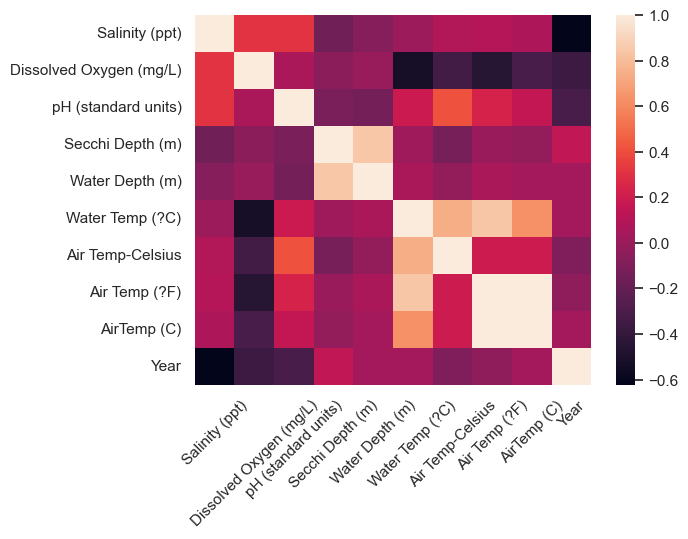

In [68]:
print('Correlation between Salinity (ppt) and Dissolved Oxygen (mg/L):')
correlations = df_sub.corr()
# not sure why this isn't printing nicely in a table
print(correlations)
sns.heatmap(correlations)
plt.xticks(rotation=45)
plt.savefig('Correlation_Matrix.png')

In [69]:
df_sub_Bay = df_sub.loc[df_sub['Site_Id'] == 'Bay',:].reset_index(drop=True)
df_sub_B = df_sub.loc[df_sub['Site_Id'] == 'B',:].reset_index(drop=True)
df_sub_C = df_sub.loc[df_sub['Site_Id'] == 'C',:].reset_index(drop=True)

bay_correlations = df_sub_Bay.corr()
#df_sub_Bay.corr() # .2902 between Dissolved Oxygen and Salinity
# it exemplifies that there is a positive correlation but it is very slight. the p value is much smaller than the 0.05 threshold. this exemplifies 
#that there is a statistical difference and the hypothesis should be rejected. 
print('Bay pearsonr results: ', stats.pearsonr(df_sub_Bay['Dissolved Oxygen (mg/L)'], df_sub_Bay['Salinity (ppt)']))
# df_sub_B.corr() # -.1285 between Dissolved Oxygen and Salinity and the p value is 0.773. The statistical value is close to 0 and closer than that of 
#bay so there is a negative correlation but it is also very slight and with the p value we can assume it is insignificant. 

print('Site B pearsonr results: ', stats.pearsonr(df_sub_B['Dissolved Oxygen (mg/L)'], df_sub_B['Salinity (ppt)']))
# df_sub_C.corr() # -0.0065 between Dissolved Oxygen and Salinity and the p value is 0.942. The statistical value is very very close to 0 so it can be assumed
# that there is no correlation between DO and Salinity for sub set C. 
print('Site C pearsonr results: ', stats.pearsonr(df_sub_C['Dissolved Oxygen (mg/L)'], df_sub_C['Salinity (ppt)']))

# Summary: From all the data in this code block, there is no statistical difference or correlation between dissolved oxygen and salinity for B and C 
# as the values are insignificant. For the Bay location, there is no strong correlation and this data is statistically different. This is something
# definitely worth noting!! Maybe we need to look at the geographic location of the Bay in comparision to B and C and understand why there is a statistical
# difference but the others dont have one. 

Bay pearsonr results:  PearsonRResult(statistic=0.29022040873908894, pvalue=1.6171702574697576e-15)
Site B pearsonr results:  PearsonRResult(statistic=-0.1284576384589439, pvalue=0.07734435148044194)
Site C pearsonr results:  PearsonRResult(statistic=-0.006502522032113635, pvalue=0.9423918549876322)


The p-values are very small with a stronger correlation, which represents the probability of seeing a correlation this extreme if the true correlation is zero.


In [70]:
import statsmodels.formula.api as smf

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                 
========================================================================================
Dep. Variable:     Q("Dissolved Oxygen (mg/L)")   R-squared:                       0.084
Model:                                      OLS   Adj. R-squared:                  0.083
Method:                           Least Squares   F-statistic:                     66.41
Date:                          Wed, 03 May 2023   Prob (F-statistic):           1.62e-15
Time:                                  16:27:33   Log-Likelihood:                -1664.8
No. Observations:                           724   AIC:                             3334.
Df Residuals:                               722   BIC:                             3343.
Df Model:                                     1                                         
Covariance Type:                      nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept               6.9034      0.124     55.854      0.000       6.661       7.146
Q("Salinity (ppt)")     0.4627      0.057      8.149      0.000       0.351       0.574
==============================================================================
Omnibus:                        8.117   Durbin-Watson:                   0.645
Prob(Omnibus):                  0.017   Jarque-Bera (JB):                8.381
Skew:                          -0.210   Prob(JB):                       0.0151
Kurtosis:                       3.319   Cond. No.                         3.33
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

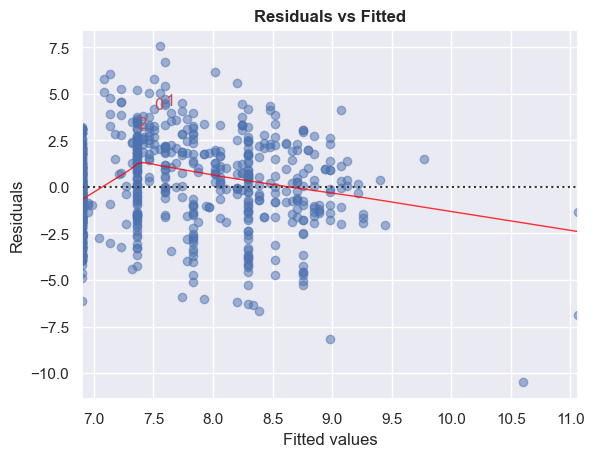

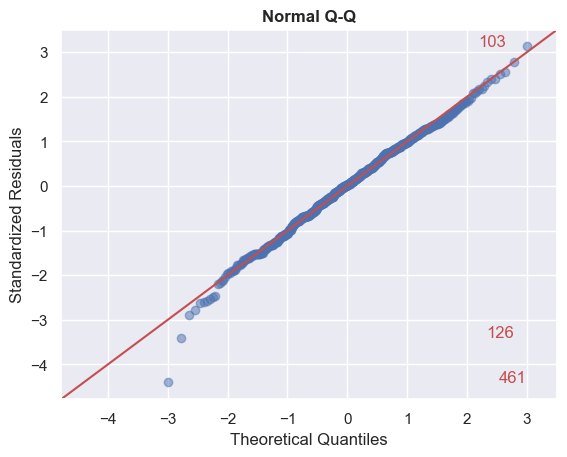

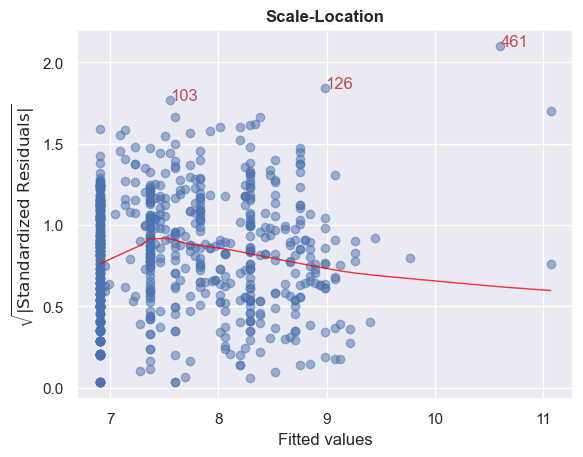

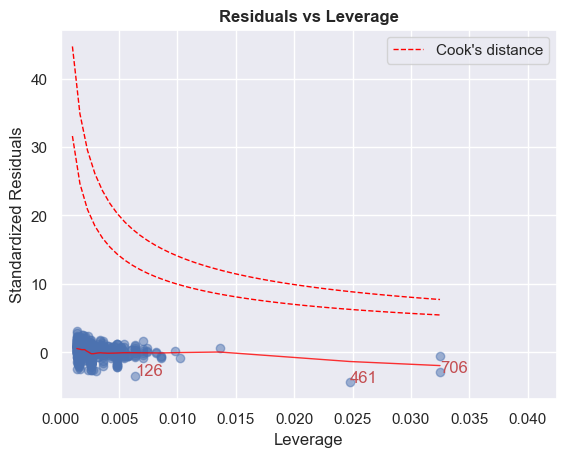

In [71]:
from utils import Linear_Reg_Diagnostic

# already dealt with clearing out the missing values above

# Linear Regression model for Bay

#this works to evaluate the linear regression calues for the bay. 
Bay_corr_model = smf.ols(formula='Q("Dissolved Oxygen (mg/L)") ~ Q("Salinity (ppt)")', data=df_sub_Bay).fit()
#the summary from the Bay_corrmodel reflects that there is a r squared value of 0.084 which signifies that there is not alot of variation
#Since this value is less than 0.3 we can say that it is weak and that there is a weak effect on the dependent variable. little variability in data
Bay_corr_model.summary()
bay_diagnostics = Linear_Reg_Diagnostic(Bay_corr_model)
bay_diagnostics.residual_plot()
plt.savefig('BayResidualPlot.png')
bay_diagnostics.qq_plot();
plt.savefig('BayQQPlot.png')
bay_diagnostics.scale_location_plot();
plt.savefig('BayScaleLocationPlot.png')
bay_diagnostics.leverage_plot();
plt.savefig('BayLeveragePlot.png')
Bay_corr_model.summary()

In [72]:
bay_diagnostics.vif_table()

              Features  VIF Factor
1  Q("Salinity (ppt)")         1.0
0            Intercept         1.9


/Users/Sydney/opt/anaconda3/lib/python3.9/site-packages/statsmodels/nonparametric/smoothers_lowess.py:227: RuntimeWarning: invalid value encountered in true_divide
  res, _ = _lowess(y, x, x, np.ones_like(x),


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                 
========================================================================================
Dep. Variable:     Q("Dissolved Oxygen (mg/L)")   R-squared:                       0.017
Model:                                      OLS   Adj. R-squared:                  0.011
Method:                           Least Squares   F-statistic:                     3.154
Date:                          Wed, 03 May 2023   Prob (F-statistic):             0.0773
Time:                                  16:27:34   Log-Likelihood:                -410.11
No. Observations:                           190   AIC:                             824.2
Df Residuals:                               188   BIC:                             830.7
Df Model:                                     1                                         
Covariance Type:                      nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept               5.4755      0.172     31.750      0.000       5.135       5.816
Q("Salinity (ppt)")    -0.2979      0.168     -1.776      0.077      -0.629       0.033
==============================================================================
Omnibus:                        3.382   Durbin-Watson:                   1.279
Prob(Omnibus):                  0.184   Jarque-Bera (JB):                2.372
Skew:                           0.090   Prob(JB):                        0.305
Kurtosis:                       2.483   Cond. No.                         1.65
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

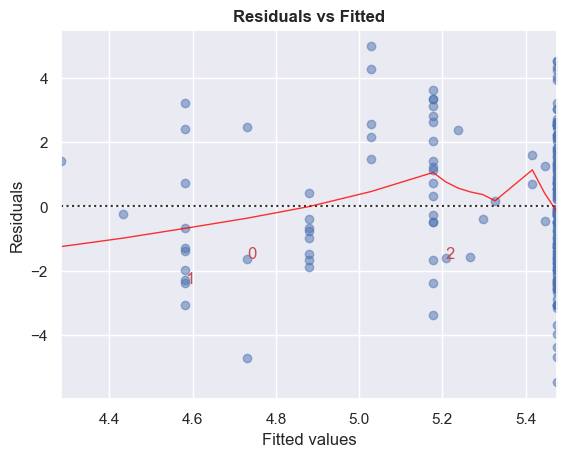

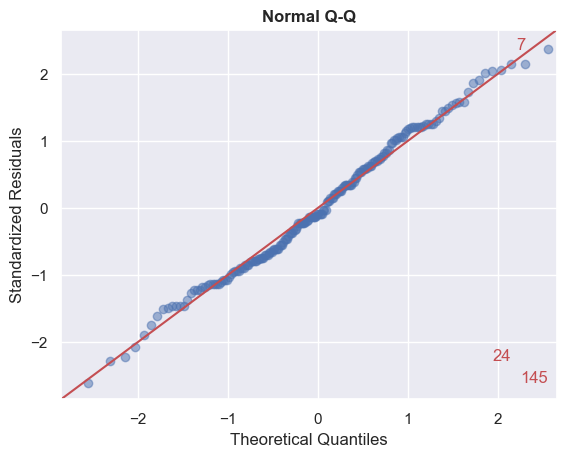

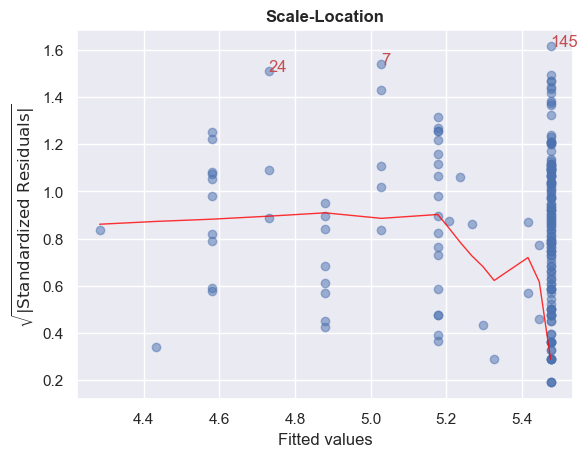

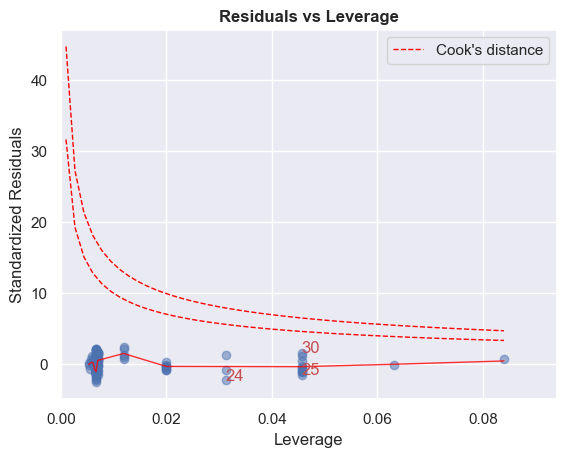

In [73]:
# Linear Regression model for Site B

SiteB_corr_model = smf.ols(formula='Q("Dissolved Oxygen (mg/L)") ~ Q("Salinity (ppt)")', data=df_sub_B).fit()
SiteB_corr_model.summary()
SiteB_diagnostics = Linear_Reg_Diagnostic(SiteB_corr_model)
SiteB_diagnostics.residual_plot()
plt.savefig('SiteBResidualPlot.png')
SiteB_diagnostics.qq_plot();
plt.savefig('SiteBQQPlot.png')
SiteB_diagnostics.scale_location_plot();
plt.savefig('SiteBScaleLocationPlot.png')
SiteB_diagnostics.leverage_plot();
plt.savefig('SiteBLeveragePlot.png')
SiteB_corr_model.summary()

In [74]:
SiteB_diagnostics.vif_table()

              Features  VIF Factor
1  Q("Salinity (ppt)")        1.00
0            Intercept        1.27


/Users/Sydney/opt/anaconda3/lib/python3.9/site-packages/statsmodels/nonparametric/smoothers_lowess.py:227: RuntimeWarning: invalid value encountered in true_divide
  res, _ = _lowess(y, x, x, np.ones_like(x),


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                 
========================================================================================
Dep. Variable:     Q("Dissolved Oxygen (mg/L)")   R-squared:                       0.000
Model:                                      OLS   Adj. R-squared:                 -0.008
Method:                           Least Squares   F-statistic:                  0.005243
Date:                          Wed, 03 May 2023   Prob (F-statistic):              0.942
Time:                                  16:27:36   Log-Likelihood:                -259.25
No. Observations:                           126   AIC:                             522.5
Df Residuals:                               124   BIC:                             528.2
Df Model:                                     1                                         
Covariance Type:                      nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept               5.4199      0.197     27.551      0.000       5.030       5.809
Q("Salinity (ppt)")    -0.0133      0.183     -0.072      0.942      -0.376       0.349
==============================================================================
Omnibus:                        4.821   Durbin-Watson:                   1.122
Prob(Omnibus):                  0.090   Jarque-Bera (JB):                4.826
Skew:                           0.475   Prob(JB):                       0.0896
Kurtosis:                       2.877   Cond. No.                         1.75
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

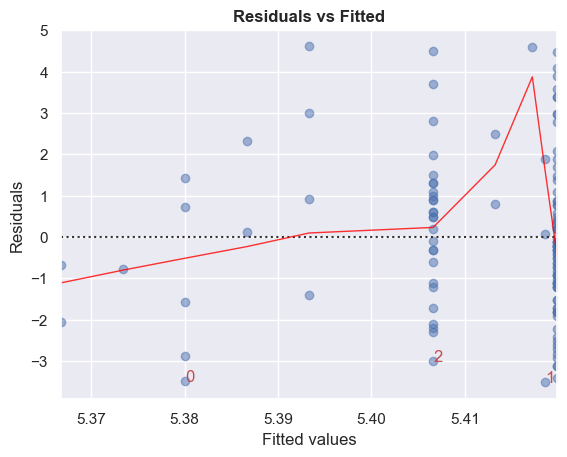

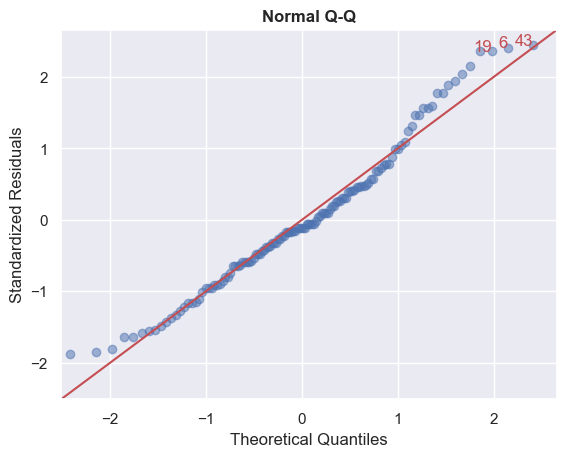

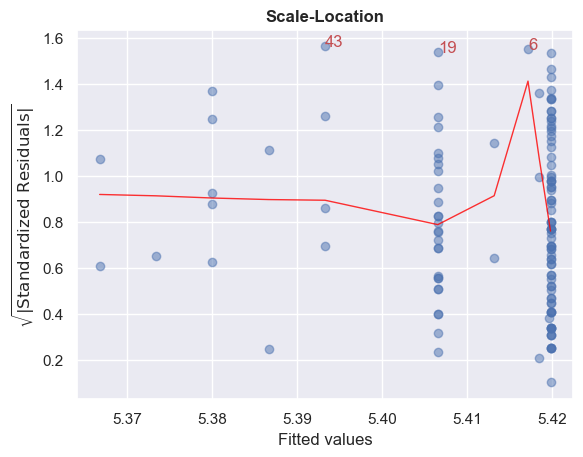

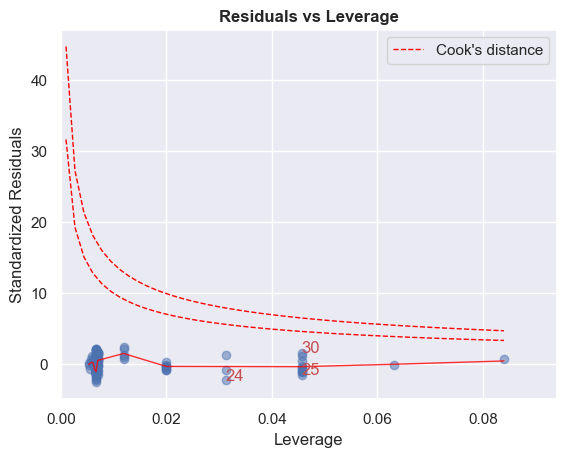

In [75]:
# Linear Regression model for Site C

SiteC_corr_model = smf.ols(formula='Q("Dissolved Oxygen (mg/L)") ~ Q("Salinity (ppt)")', data=df_sub_C).fit()
SiteC_corr_model.summary()
SiteC_diagnostics = Linear_Reg_Diagnostic(SiteC_corr_model)
SiteC_diagnostics.residual_plot()
plt.savefig('SiteCResidualPlot.png')
SiteC_diagnostics.qq_plot();
plt.savefig('SiteCQQPlot.png')
SiteC_diagnostics.scale_location_plot();
plt.savefig('SiteCScaleLocationPlot.png')
SiteB_diagnostics.leverage_plot();
plt.savefig('SiteCLeveragePlot.png')
SiteC_corr_model.summary()

In [76]:
SiteC_diagnostics.vif_table()

              Features  VIF Factor
1  Q("Salinity (ppt)")        1.00
0            Intercept        1.34


In [77]:
df_sub_Bay['Read_Date'] = pd.to_datetime(df_sub_Bay['Read_Date'], format='%m/%d/%Y')
df_sub_Bay_dt = df_sub_Bay.set_index('Read_Date').sort_index() # makes sure years are in order
df_sub_Bay_dt.head()

,Site_Id,Unit_Id,Salinity (ppt),Dissolved Oxygen (mg/L),pH (standard units),Secchi Depth (m),Water Depth (m),Water Temp (?C),Air Temp-Celsius,Air Temp (?F),Time (24:00),Field_Tech,DateVerified,WhoVerified,AirTemp (C),Year
Read_Date,,,,,,,,,,,,,,,,
1990-01-22,Bay,NaN,1.0,9.7,7.5,0.15,0.65,10.0,NaN,53.6,14:24,"J Phillips, Mary Feldman",NaN,NaN,12.0,1990
1990-02-07,Bay,NaN,3.4,10.8,7.5,0.20,0.60,10.0,NaN,50.0,0:00,"J Phillips, Mary Feldman",NaN,NaN,10.0,1990
1990-02-12,Bay,NaN,3.2,10.6,7.0,0.20,0.70,10.0,NaN,48.2,4:48,"J Phillips, Mary Feldman",NaN,NaN,9.0,1990
1990-02-20,Bay,NaN,4.2,11.6,7.5,0.15,0.39,5.0,NaN,41.0,0:00,"J Phillips, Mary Feldman",NaN,NaN,5.0,1990
1990-02-27,Bay,NaN,2.8,13.8,7.0,0.50,1.50,2.5,NaN,33.8,19:12,"J Phillips, Mary Feldman",NaN,NaN,1.0,1990


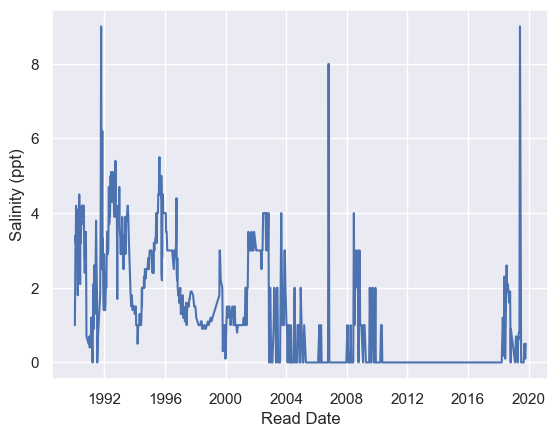

In [84]:
# displaying data
fig, ax = plt.subplots()
ax.plot(df_sub_Bay_dt['Salinity (ppt)']);
ax.set_xlabel('Read Date')
ax.set_ylabel('Salinity (ppt)')
plt.savefig('BaySalinityDataDisplay.png')

In [85]:
# testing for stationarity
from statsmodels.tsa.stattools import adfuller

def adf_print(time_series):
    adf_output = adfuller(time_series)
    stat = adf_output[0]
    pval = adf_output[1]
    print('ADF Statistic:', stat)
    print('p-value:', pval)
    return None

adf_print(df_sub_Bay_dt['Salinity (ppt)'])

ADF Statistic: -3.3949845965469327
p-value: 0.011131039223937737


In [80]:
# using auto-arima to make a model of the time series
from pmdarima import auto_arima

auto_arima_model = auto_arima(df_sub_Bay['Salinity (ppt)'])
auto_arima_model.summary()

/Users/Sydney/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1899: RuntimeWarning: invalid value encountered in reciprocal
  return np.roots(self.polynomial_reduced_ar)**-1
/Users/Sydney/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1906: RuntimeWarning: invalid value encountered in reciprocal
  return np.roots(self.polynomial_reduced_ma)**-1
/Users/Sydney/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1899: RuntimeWarning: invalid value encountered in reciprocal
  return np.roots(self.polynomial_reduced_ar)**-1
/Users/Sydney/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1906: RuntimeWarning: invalid value encountered in reciprocal
  return np.roots(self.polynomial_reduced_ma)**-1
/Users/Sydney/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1899: RuntimeWarning: invalid value encountered in reciprocal
  return np.roots(se

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  724
Model:               SARIMAX(0, 1, 1)   Log Likelihood                -904.461
Date:                Wed, 03 May 2023   AIC                           1812.923
Time:                        16:27:42   BIC                           1822.090
Sample:                             0   HQIC                          1816.461
                                - 724                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.6622      0.015    -43.454      0.000      -0.692      -0.632
sigma2         0.7141      0.010     74.044      0.000       0.695       0.733
===================================================================================
Ljung-Box (L1) (Q):                   0.15   Jarque-Bera (JB):             26374.77
Prob(Q):                              0.70   Prob(JB):                         0.00
Heteroskedasticity (H):               0.85   Skew:                             2.85
Prob(H) (two-sided):                  0.21   Kurtosis:                        32.03
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [86]:
df_sub_Bay_dt.head()

,Site_Id,Unit_Id,Salinity (ppt),Dissolved Oxygen (mg/L),pH (standard units),Secchi Depth (m),Water Depth (m),Water Temp (?C),Air Temp-Celsius,Air Temp (?F),Time (24:00),Field_Tech,DateVerified,WhoVerified,AirTemp (C),Year
Read_Date,,,,,,,,,,,,,,,,
1990-01-22,Bay,NaN,1.0,9.7,7.5,0.15,0.65,10.0,NaN,53.6,14:24,"J Phillips, Mary Feldman",NaN,NaN,12.0,1990
1990-02-07,Bay,NaN,3.4,10.8,7.5,0.20,0.60,10.0,NaN,50.0,0:00,"J Phillips, Mary Feldman",NaN,NaN,10.0,1990
1990-02-12,Bay,NaN,3.2,10.6,7.0,0.20,0.70,10.0,NaN,48.2,4:48,"J Phillips, Mary Feldman",NaN,NaN,9.0,1990
1990-02-20,Bay,NaN,4.2,11.6,7.5,0.15,0.39,5.0,NaN,41.0,0:00,"J Phillips, Mary Feldman",NaN,NaN,5.0,1990
1990-02-27,Bay,NaN,2.8,13.8,7.0,0.50,1.50,2.5,NaN,33.8,19:12,"J Phillips, Mary Feldman",NaN,NaN,1.0,1990


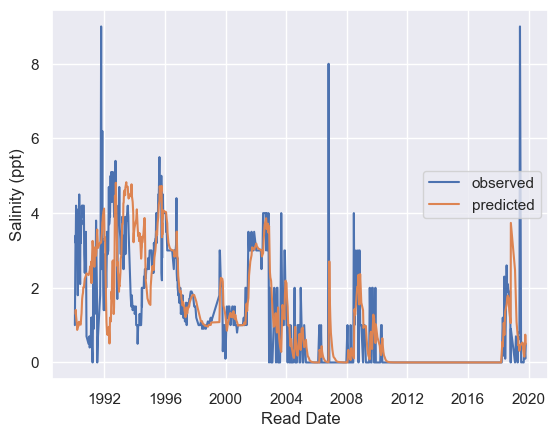

In [89]:
# visualizing the fitted values of the ARIMA model

in_samp_pred = auto_arima_model.predict_in_sample()
in_samp_pred = pd.Series(in_samp_pred, index=df_sub_Bay_dt['Salinity (ppt)'].index)

fig, ax = plt.subplots()
ax.plot(df_sub_Bay_dt['Salinity (ppt)'], label='observed')
ax.plot(in_samp_pred[1:], label='predicted')
ax.set_xlabel('Read Date')
ax.set_ylabel('Salinity (ppt)')
ax.legend();
plt.savefig('BayARIMAFittedValues.png')

In [98]:
df_sub_Bay_dt.index[-5:-1]

DatetimeIndex(['2019-08-20', '2019-09-03', '2019-09-18', '2019-10-11'], dtype='datetime64[ns]', name='Read_Date', freq=None)

80
80


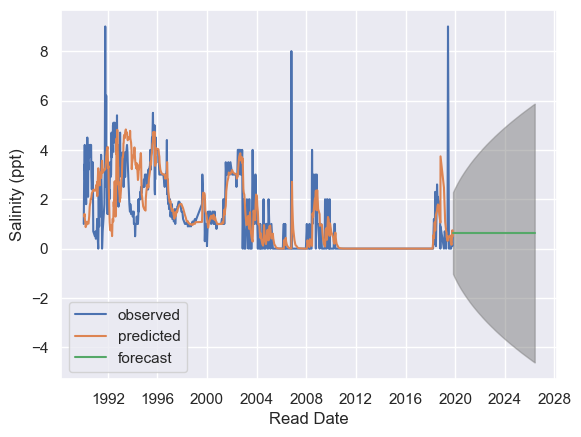

In [101]:
# making a forecast for 25 years after the conclusion of the time series
forecast, ci = auto_arima_model.predict(80, return_conf_int=True)
future_dates = pd.date_range(df_sub_Bay_dt.index[-1], periods=80, freq='M',inclusive='neither')

fig, ax = plt.subplots()
ax.plot(df_sub_Bay_dt['Salinity (ppt)'], label='observed')
ax.plot(in_samp_pred[1:], label='predicted')
ax.plot(future_dates,forecast, label='forecast')
ax.fill_between(future_dates, ci[:,0], ci[:,1], color = 'gray', alpha=0.5) # our confidence intervals
ax.set_xlabel('Read Date')
ax.set_ylabel('Salinity (ppt)')
ax.legend();
plt.savefig('BaySalinityForecast.png')